<a href="https://colab.research.google.com/github/saanvi0204/credit_card_fraud_detection/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting up environment

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

sns.set_theme(context='notebook',
              style='darkgrid',
              palette='Set2',
              font_scale=0.75,
              rc={"figure.figsize": (4, 3)})
RANDOM_SEED = 42

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Data loading and overview

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Autoencoders/Credit card fraud detection/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().values.any()

False

In [ ]:
df['Hour'] = df['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)

Fraudulent Transactions: 0.17%
Legitimate Transactions: 99.83%


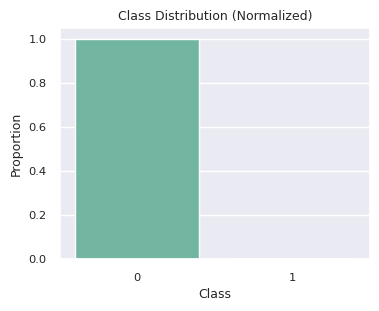

In [ ]:
fraud_ratio = df['Class'].value_counts(normalize=True)
print(f"Fraudulent Transactions: {fraud_ratio[1]*100:.2f}%")
print(f"Legitimate Transactions: {fraud_ratio[0]*100:.2f}%")

sns.barplot(x=fraud_ratio.index, y=fraud_ratio.values)
plt.title('Class Distribution (Normalized)')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.show()

In [ ]:
df.Class.value_counts()

,count
Class,
0,284315
1,492


## Exploratory data analysis

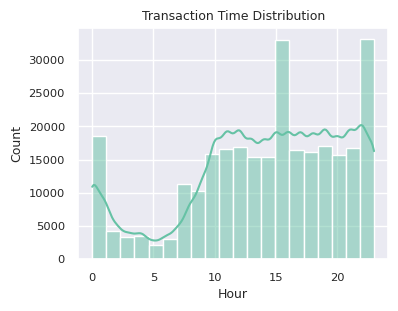

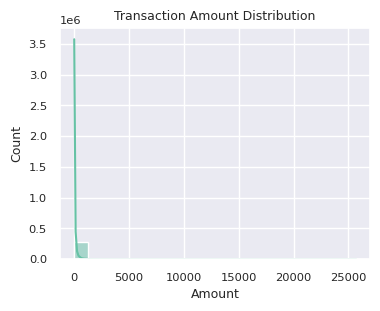

In [ ]:
sns.histplot(df['Hour'], kde=True, bins=20)
plt.title('Transaction Time Distribution')
plt.show()

sns.histplot(df['Amount'], kde=True, bins=20)
plt.title('Transaction Amount Distribution')
plt.show()

In [ ]:
df['Log_Amount'] = np.log1p(df['Amount'])

In [ ]:
df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Hour,Log_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.0,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.0,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.0,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.0,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,1.0,4.262539


In [ ]:
df = df[[col for col in df if col!='Class'] + ['Class']]

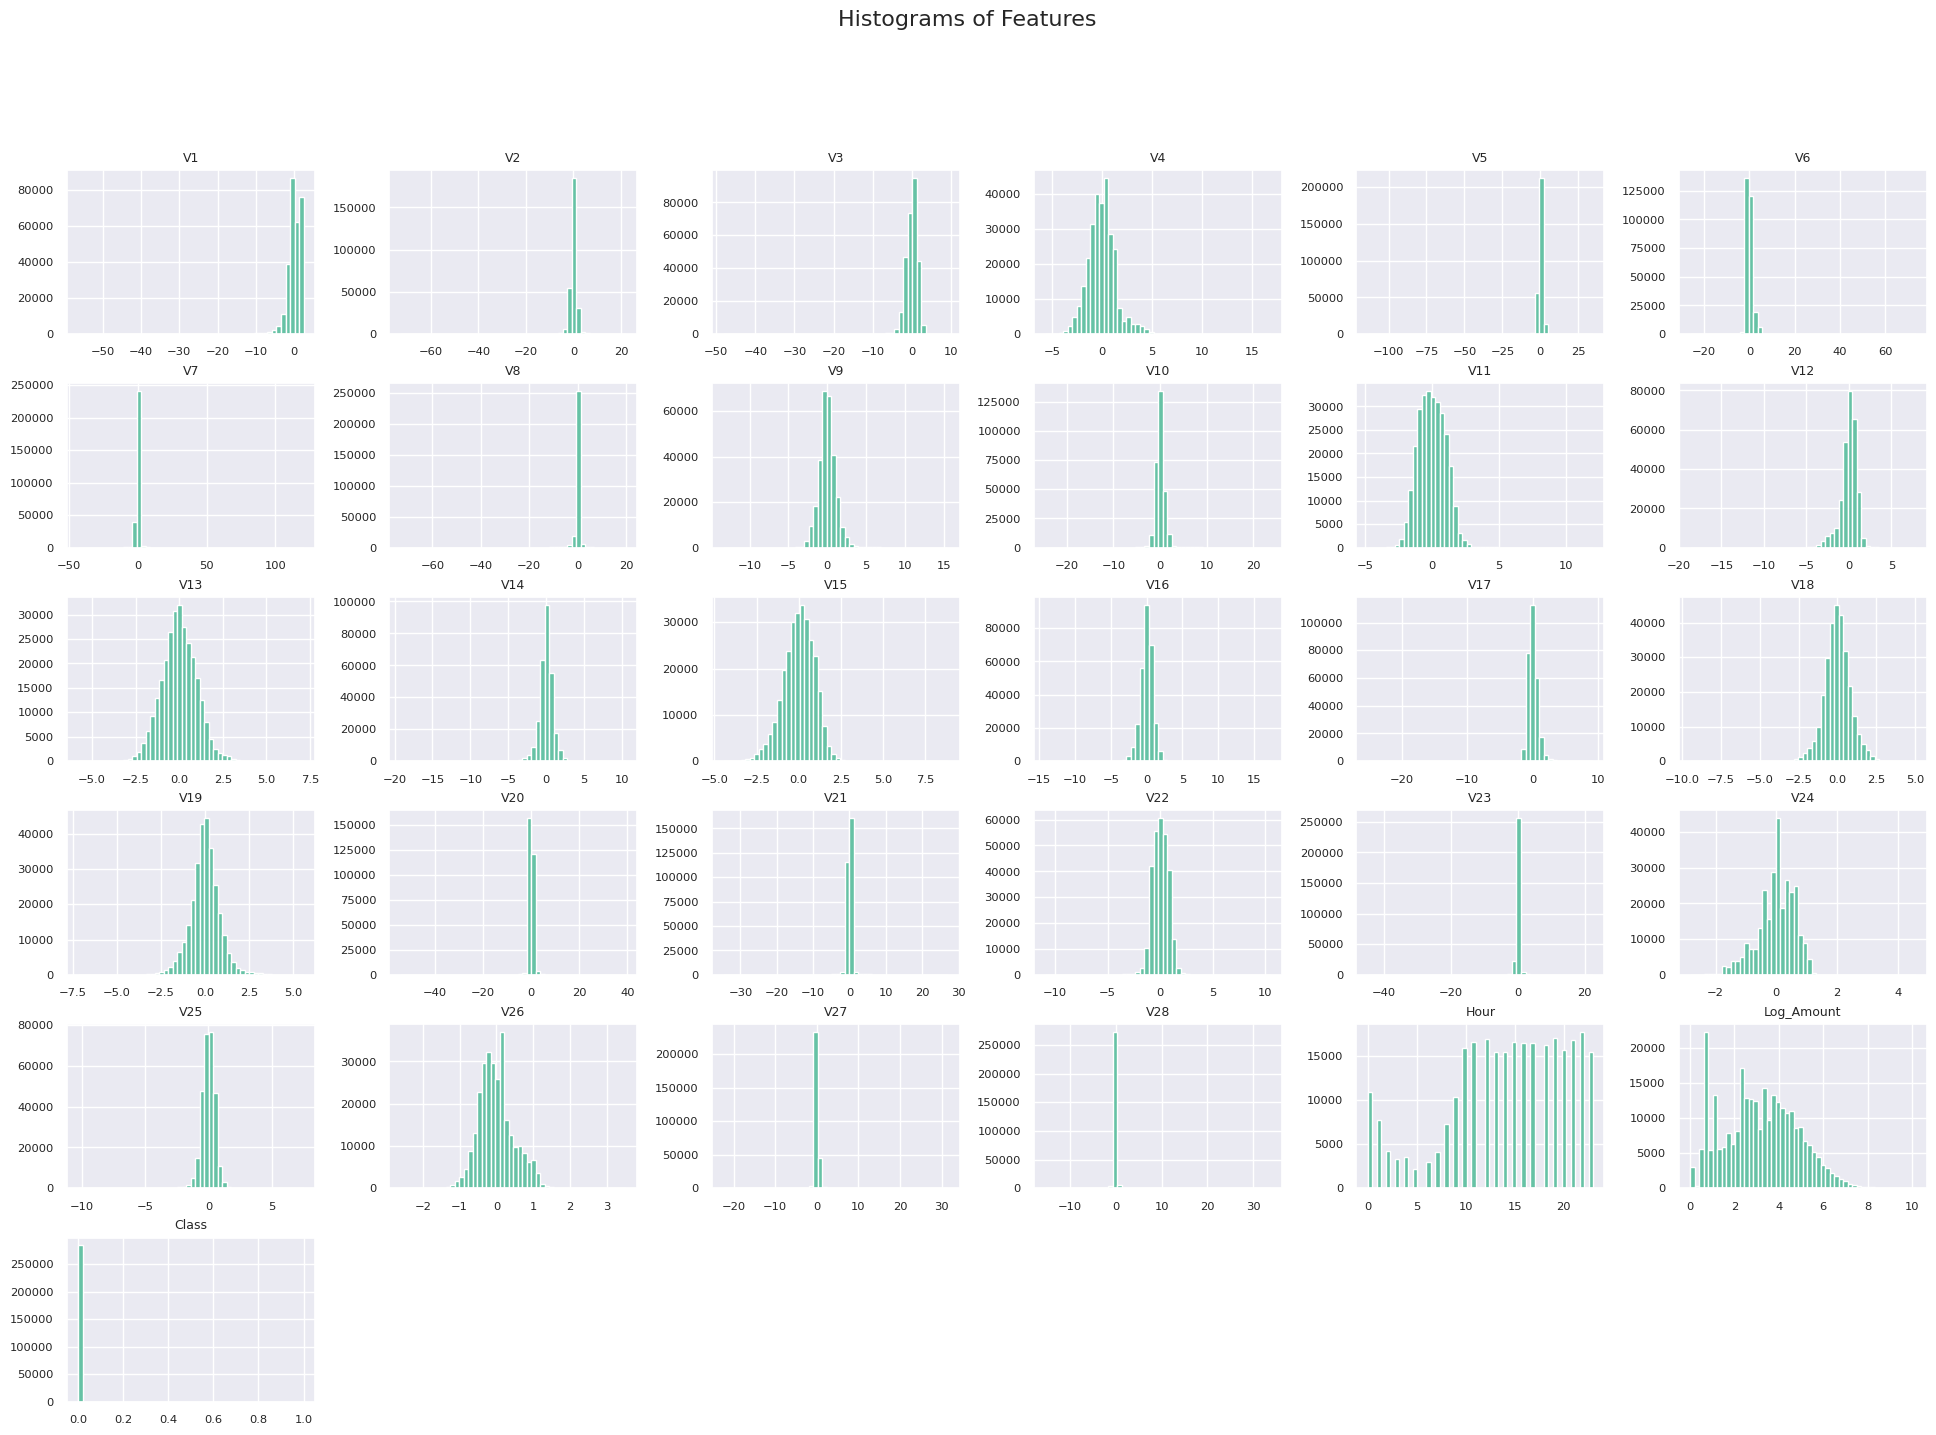

In [ ]:
df.hist(figsize=(24, 16), bins=50)
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

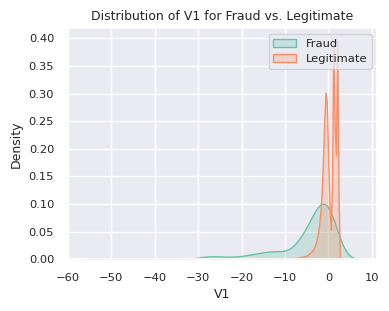

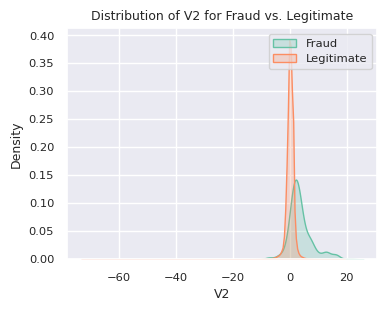

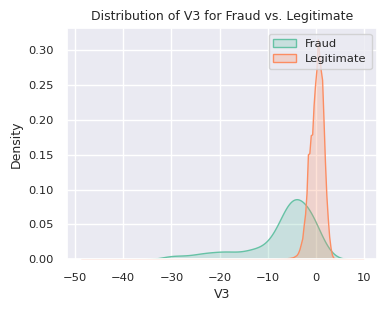

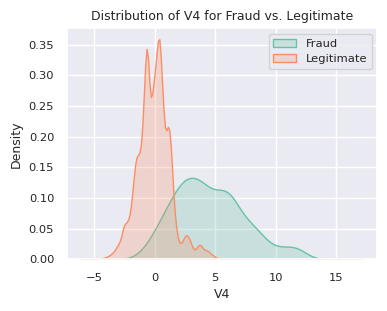

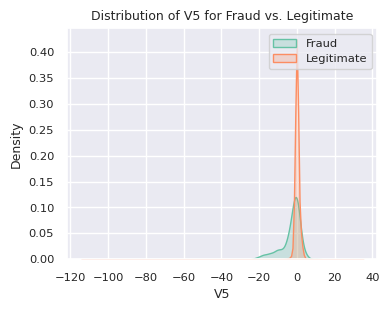

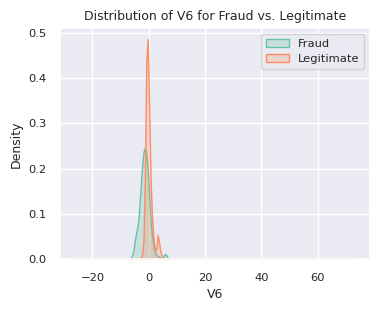

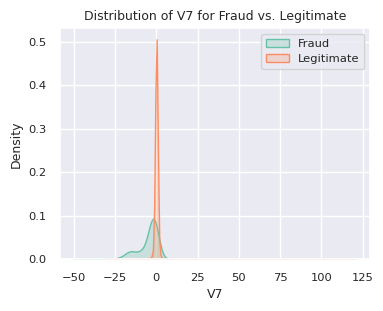

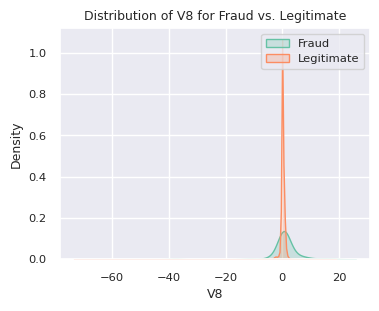

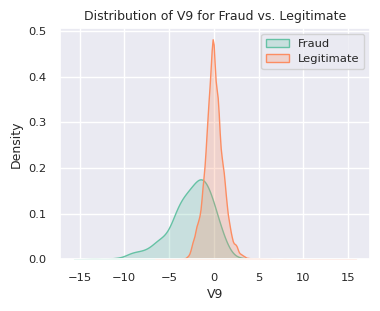

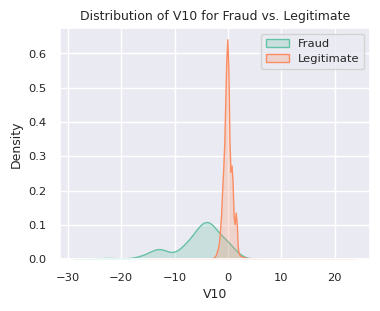

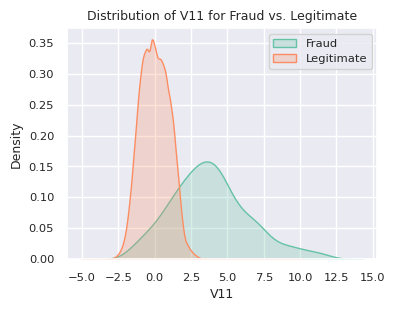

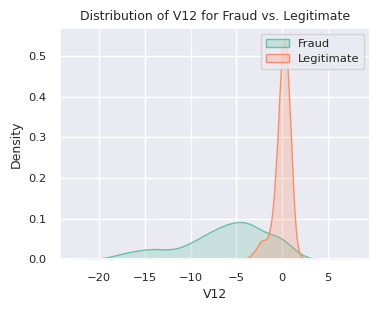

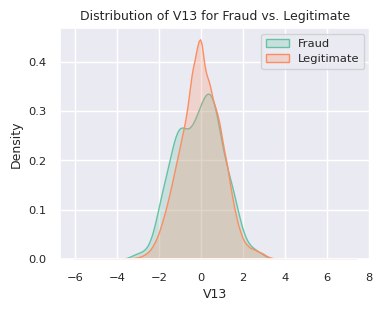

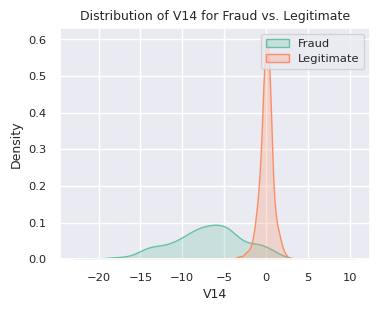

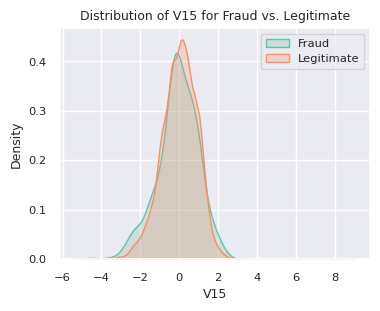

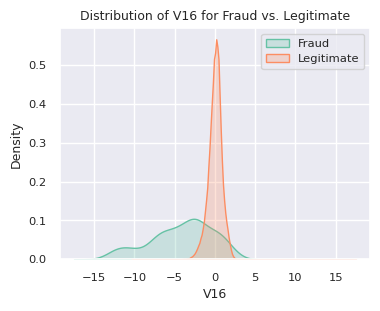

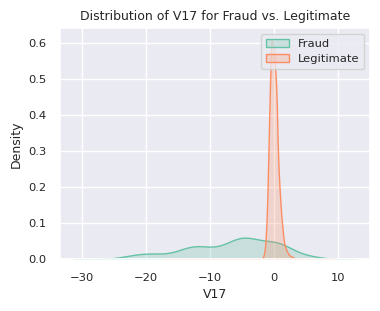

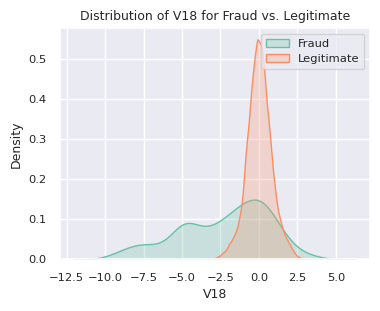

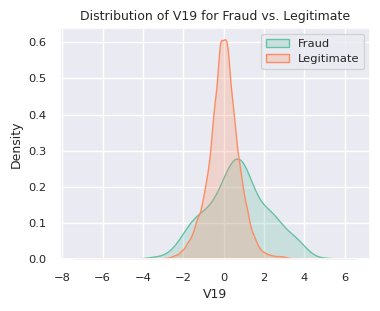

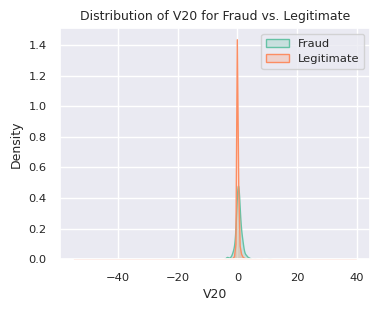

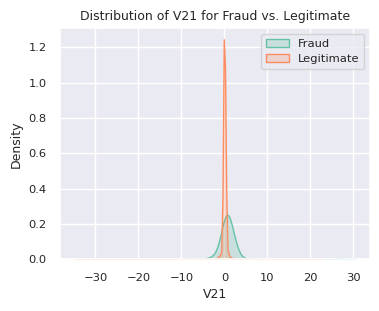

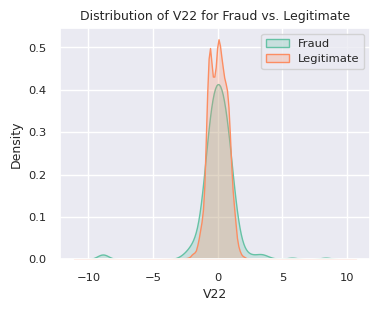

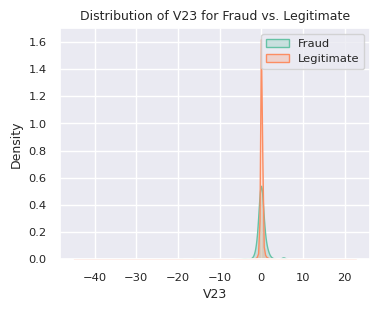

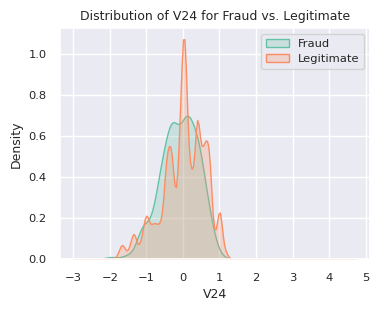

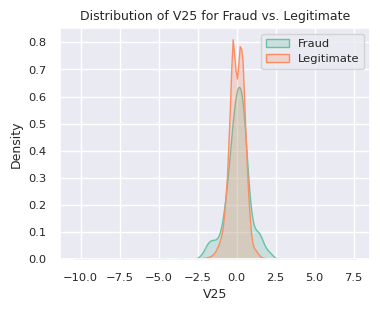

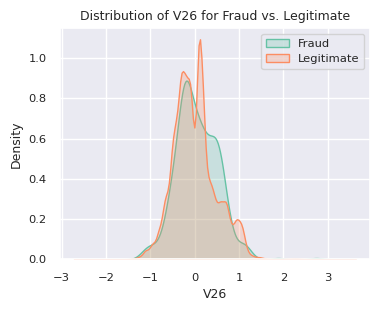

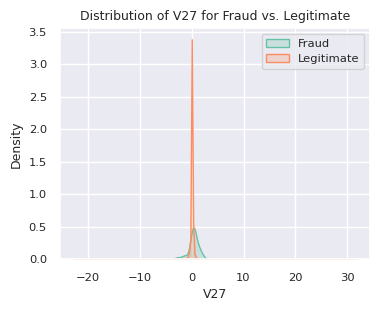

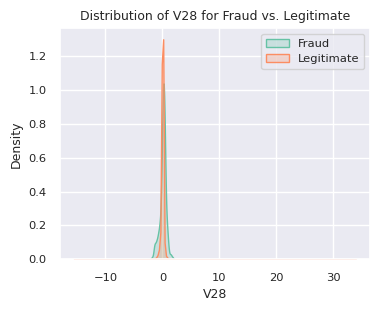

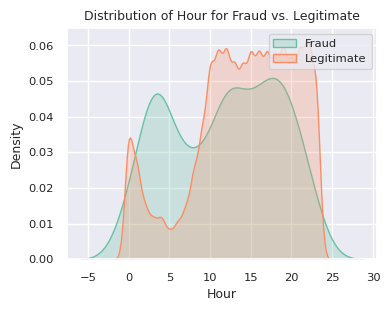

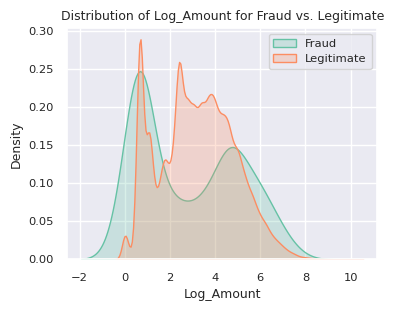

In [ ]:
fraud_data = df[df['Class'] == 1]
legitimate_data = df[df['Class'] == 0]

for col in df.columns[:-1]:
    plt.figure(figsize=(4, 3))
    sns.kdeplot(fraud_data[col], label='Fraud', fill=True)
    sns.kdeplot(legitimate_data[col], label='Legitimate', fill=True)
    plt.title(f'Distribution of {col} for Fraud vs. Legitimate')
    plt.legend()
    plt.show()

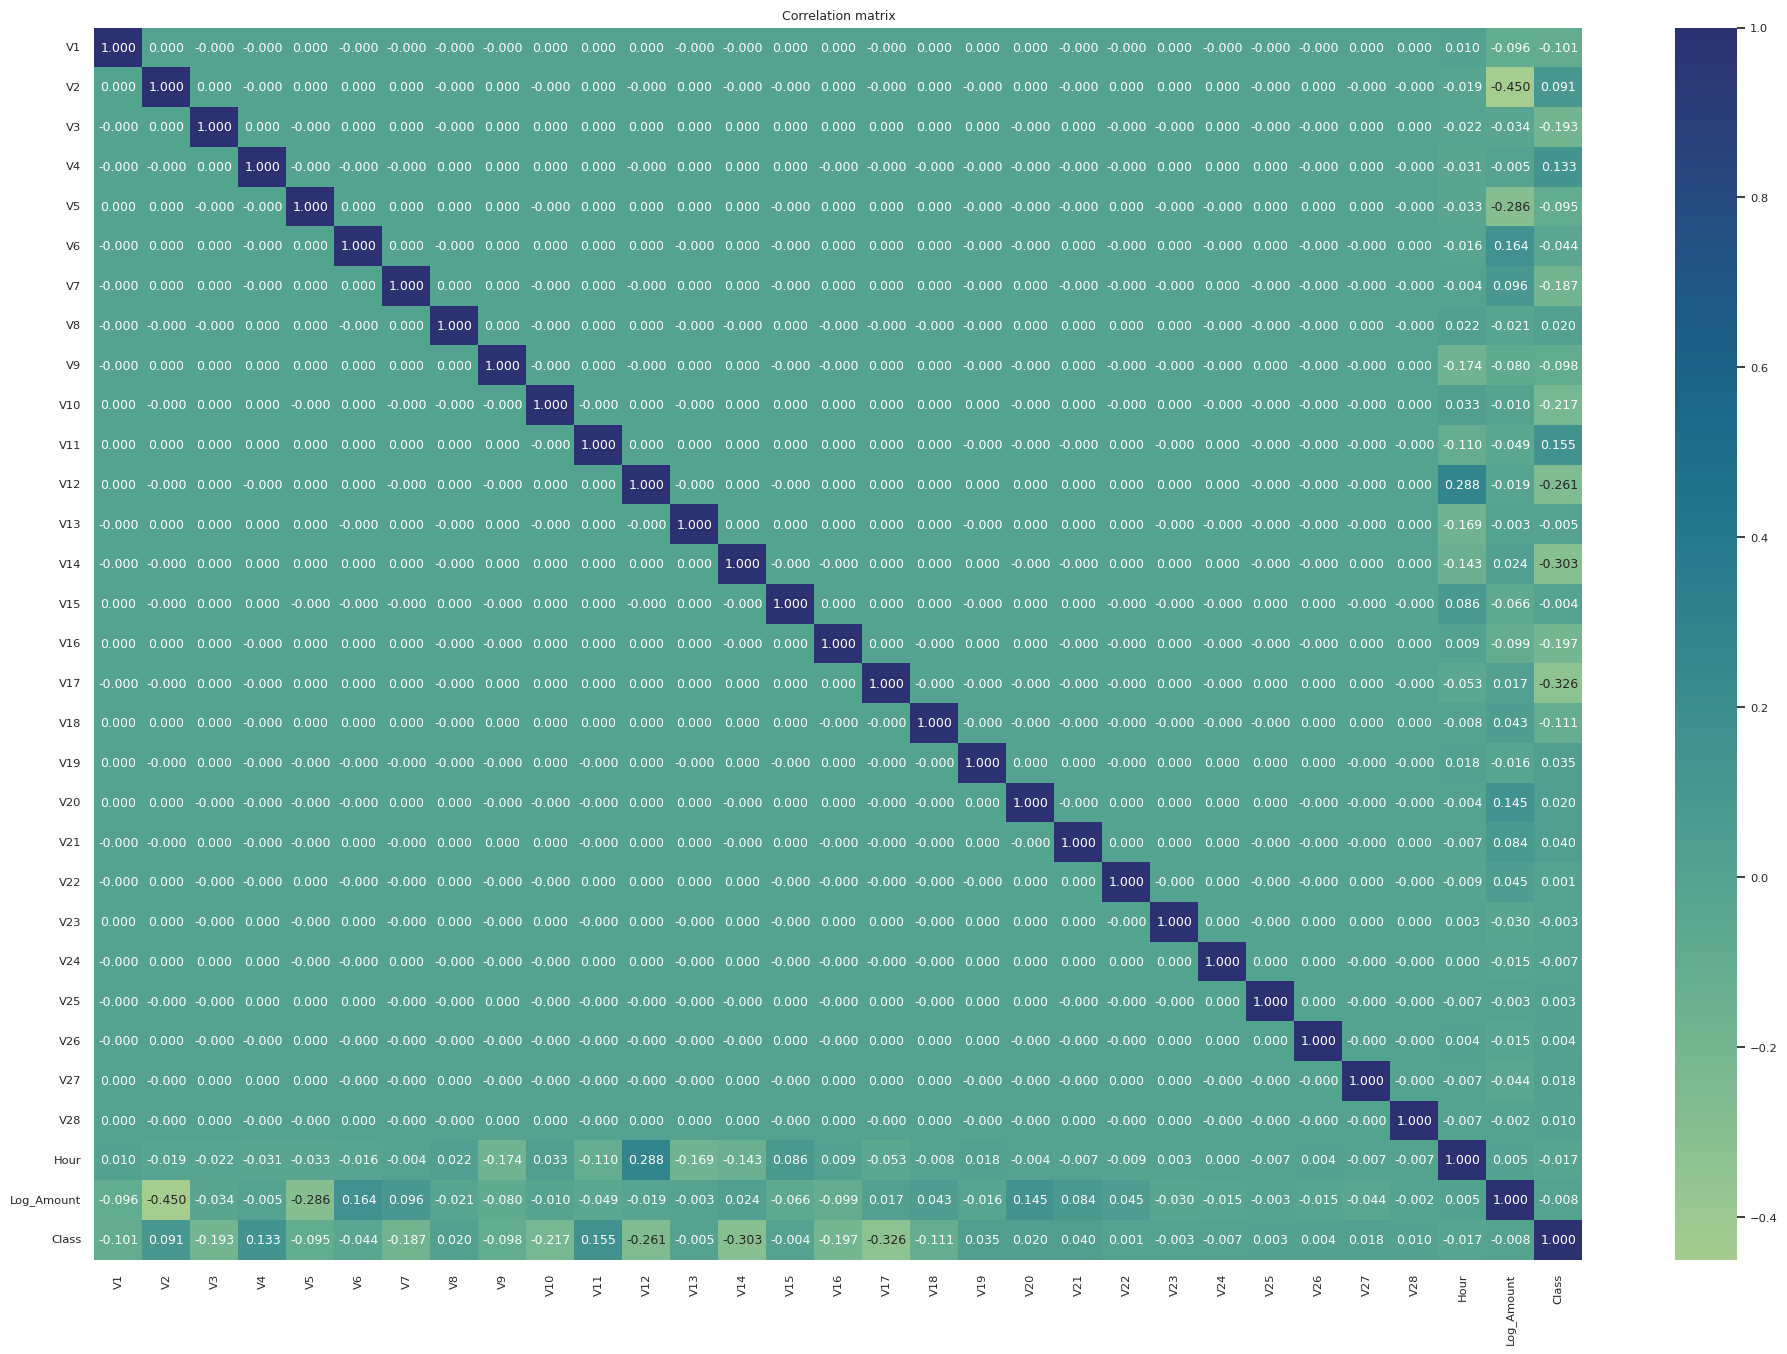

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, cmap='crest', annot=True, fmt='.3f')
plt.title('Correlation matrix')
plt.show()

## Feauture importance

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [ ]:
model = RandomForestClassifier(random_state=RANDOM_SEED)
model.fit(X, y)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

       Feature  Importance
16         V17    0.198829
13         V14    0.128218
11         V12    0.104459
15         V16    0.070024
9          V10    0.068996
10         V11    0.064265
8           V9    0.032173
3           V4    0.031508
6           V7    0.026321
17         V18    0.023242
2           V3    0.019495
25         V26    0.019309
20         V21    0.017582
5           V6    0.014982
0           V1    0.014704
19         V20    0.013877
26         V27    0.013625
1           V2    0.012736
27         V28    0.012095
12         V13    0.011613
7           V8    0.011603
23         V24    0.011575
29  Log_Amount    0.011515
18         V19    0.011342
4           V5    0.011301
14         V15    0.011178
21         V22    0.010197
24         V25    0.008342
22         V23    0.007541
28        Hour    0.007354


## t-SNE plot

In [ ]:
RATIO_TO_FRAUD = 15

df1 = df.drop(['Hour', 'Log_Amount'], axis=1)

fraud = df1[df1.Class == 1]
legit = df1[df1.Class == 0]

legit_undersampled = legit.sample(
    int(len(fraud) * RATIO_TO_FRAUD),
    random_state=RANDOM_SEED
)

visualisation_initial = pd.concat([fraud, legit_undersampled])
column_names = list(visualisation_initial.drop('Class', axis=1).columns)

features, labels = visualisation_initial.drop('Class', axis=1).values, \
                   visualisation_initial.Class.values

In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d (What are you? An alien that can visualise >3d?). Make sure the "dimensions" argument is in (2, 3)')

    features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)

    fig, ax = plt.subplots(figsize=(8,8))

    if dimensions == 3: ax = fig.add_subplot(111, projection='3d')

    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Fraud'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Legitimate'
    )

    plt.legend(loc='best')
    plt.savefig(save_as);
    plt.show;

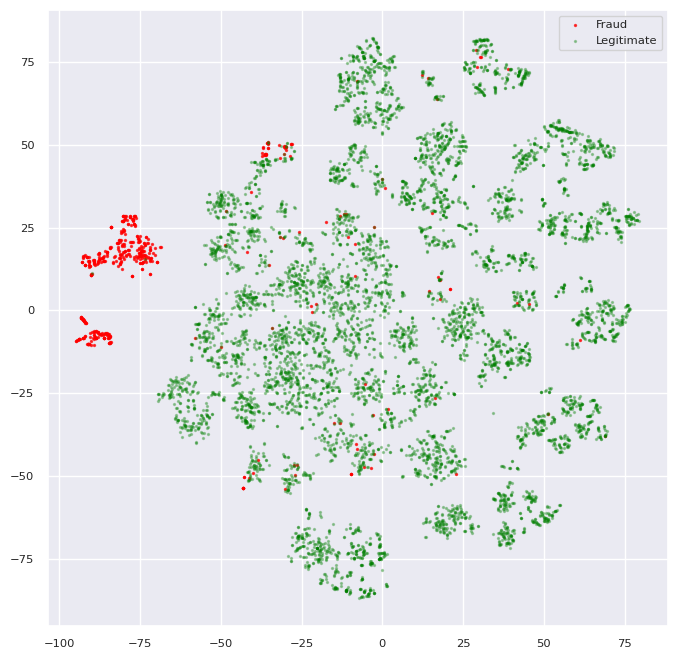

In [ ]:
tsne_scatter(features, labels, dimensions=2, save_as='tsne_initial_2d.png')

## Saving preprocessed data

In [ ]:
processed_df=df.drop(['Hour','V15','V22','V23','V25','V26'], axis=1)
processed_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V17,V18,V19,V20,V21,V24,V27,V28,Log_Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.207971,0.025791,0.403993,0.251412,-0.018307,0.066928,0.133558,-0.021053,5.014760,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.339846,-0.008983,0.014724,1.305626,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.689281,-0.055353,-0.059752,5.939276,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,-1.175575,0.062723,0.061458,4.824306,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.141267,0.219422,0.215153,4.262539,0


In [ ]:
file_path='/content/drive/MyDrive/Autoencoders/Credit card fraud detection/processed_df.csv'
processed_df.to_csv(file_path, index=False)